In [160]:
import os
import numpy as np
import cv2 as cv
import gc # for garbage coll|ction

In [161]:
IMG_SIZE = (200,200) # works well for simpsons dataset
channels = 1 # we will be working with grayscale
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [162]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))

# Sort in descending order
char_dict = sorted(char_dict.items(), key=lambda item: item[1], reverse=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [163]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 16:
        break

characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten',
 'chief_wiggum',
 'abraham_grampa_simpson',
 'sideshow_bob',
 'apu_nahasapeemapetilon',
 'kent_brockman',
 'comic_book_guy']

In [164]:
from sklearn.utils import shuffle

In [165]:
# Create the training data
images = []
labels = []

for char in characters:
    folder_path = os.path.join(char_path, char)
    if not os.path.exists(folder_path):
        continue
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        try:
            img = cv.imread(file_path)
            if img is None:
                continue
            if channels == 1:
                img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img = cv.resize(img, IMG_SIZE)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(char)
        except Exception:
            continue  # Skip unreadable files

images_np = np.array(images)
labels_np = np.array(labels)

In [166]:
images_shuffled, labels_shuffled = shuffle(images_np, labels_np, random_state=42)
# train = (images_shuffled, labels_shuffled)

In [167]:
# creating a sorted list of unique labels
unique_labels = sorted(set(labels_shuffled))
# mapping each label to its index
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
# mapping train as list of [image, label_index]
train = [[images_shuffled[i], label_to_index[labels_shuffled[i]]] for i in range(len(labels_shuffled))]

In [168]:
len(train)

18177

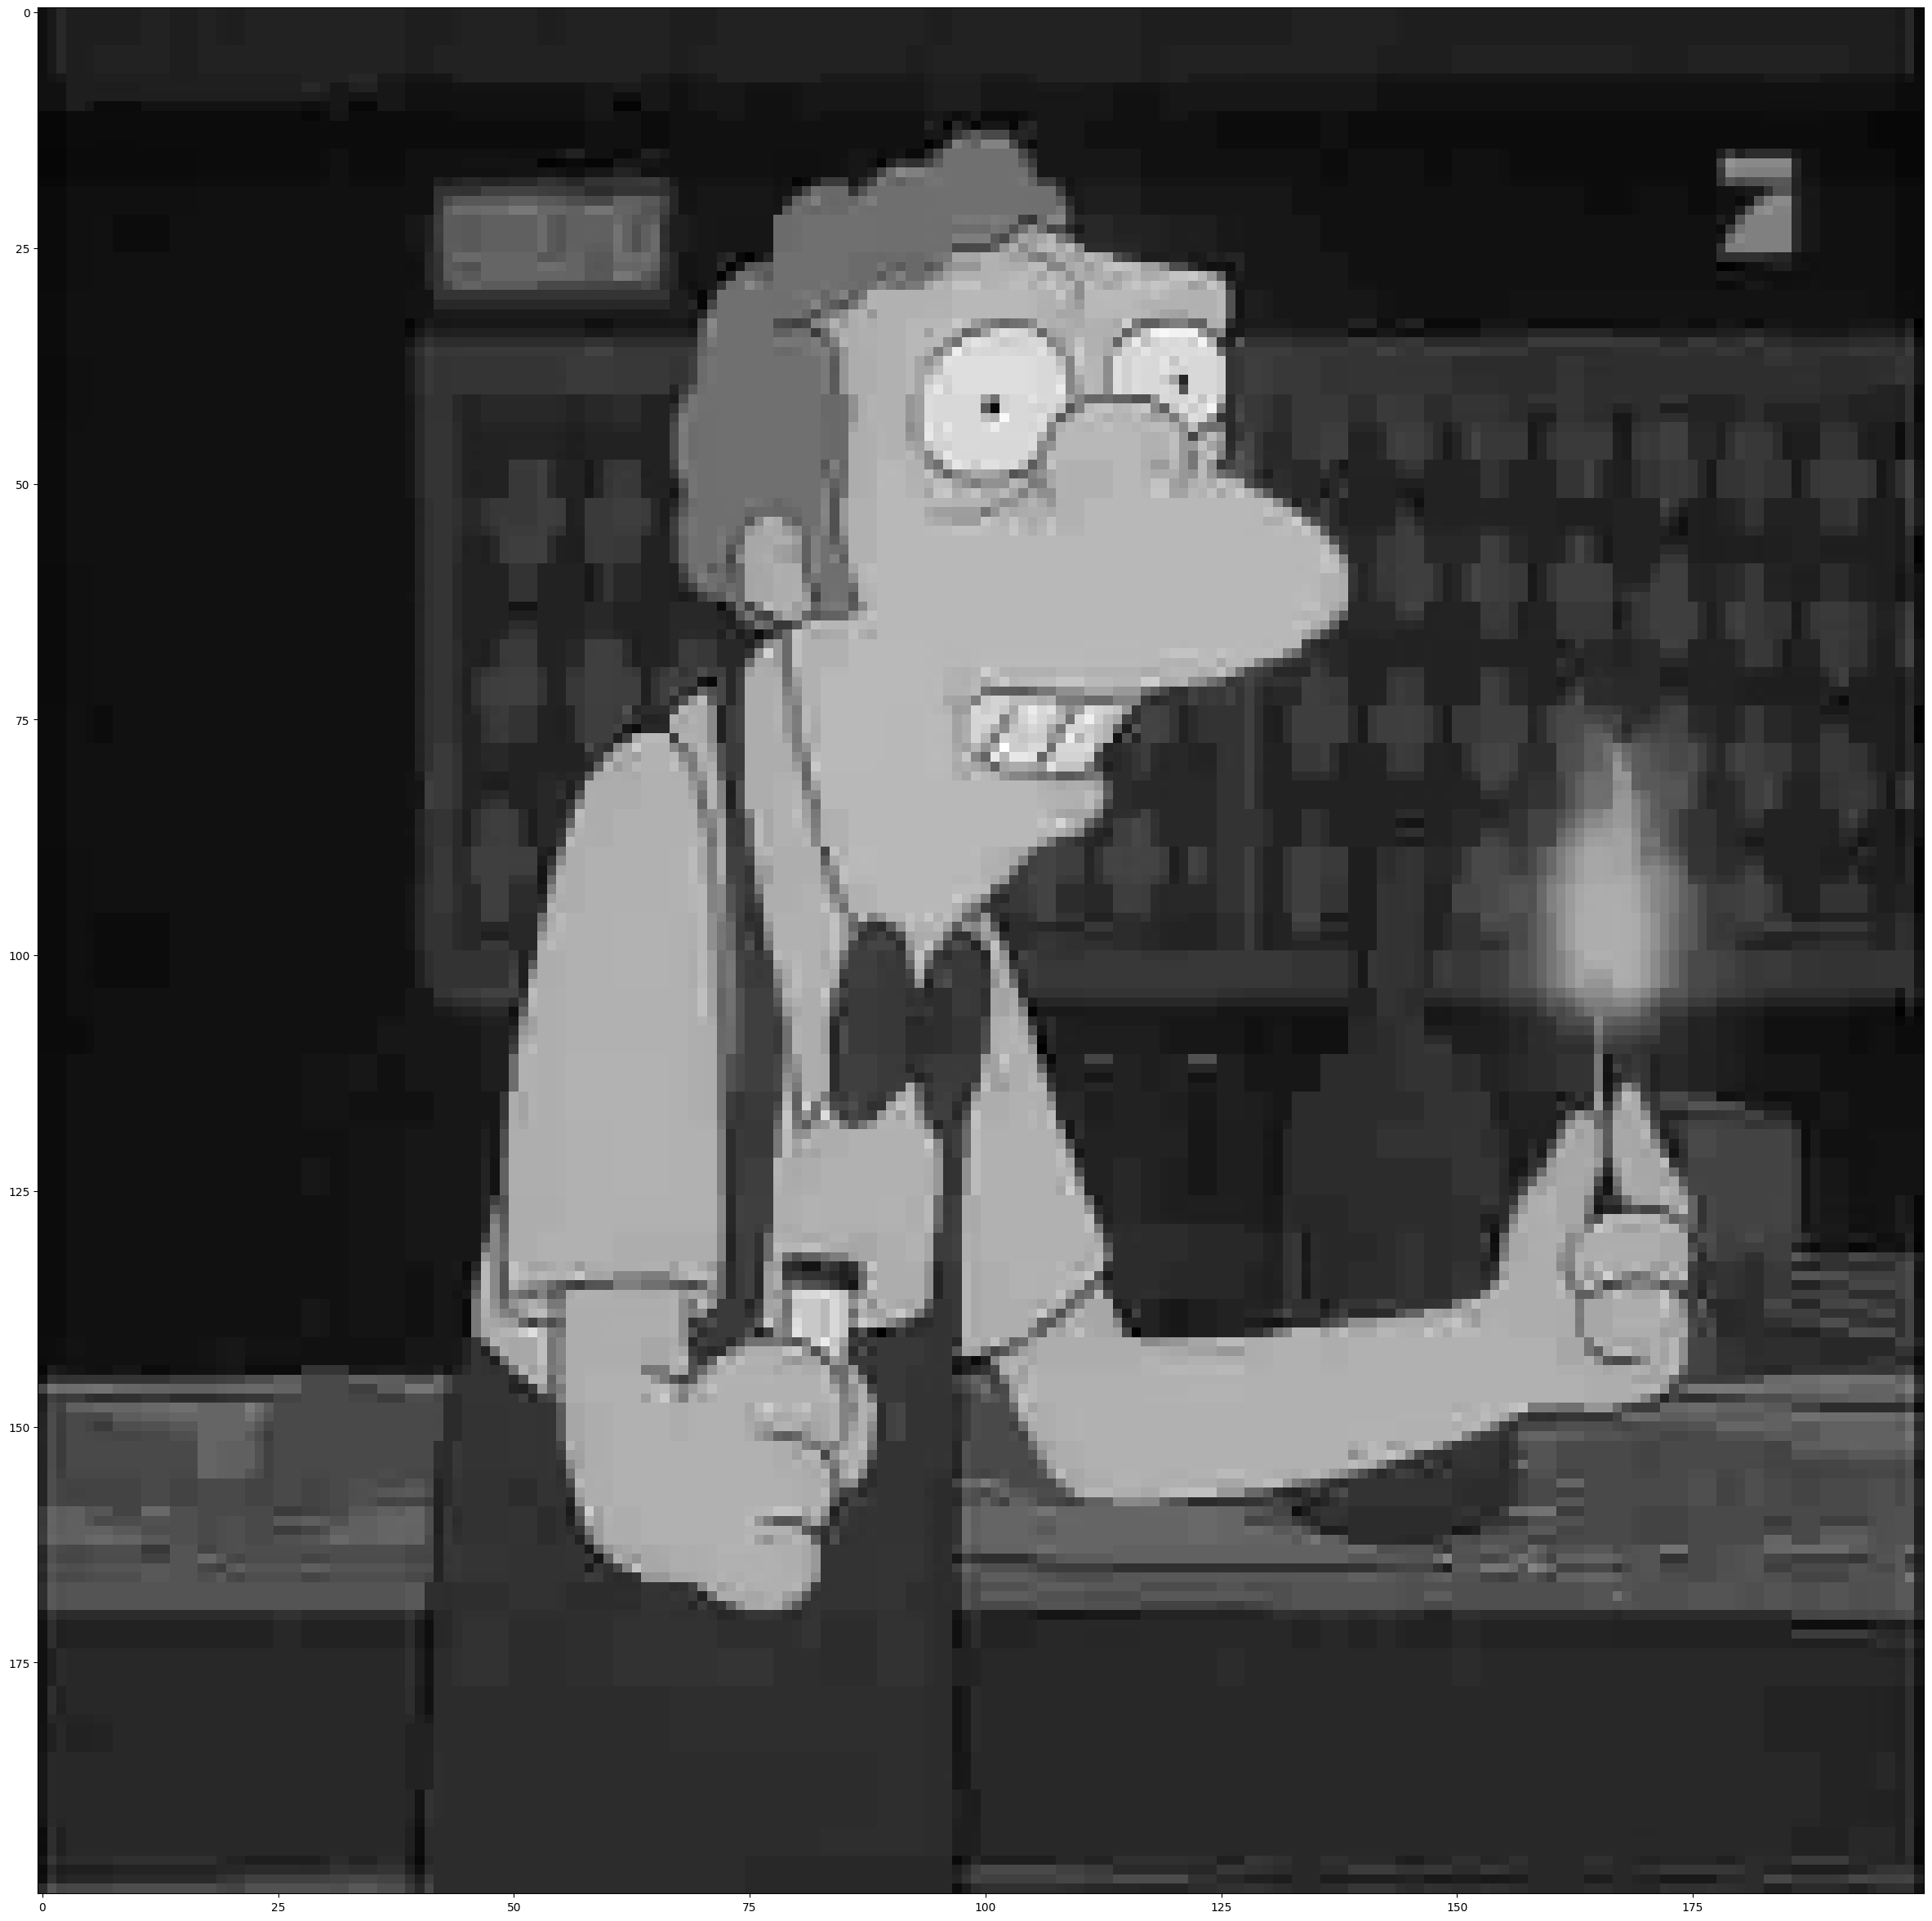

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [189]:
featureSet = [item[0] for item in train]
labels = [item[1] for item in train]

In [190]:
featureSet = np.array(featureSet)  # shape: (num_samples, height, width, channels)
# if images are grayscale, shape is (num_samples, height, width, 1)
if featureSet.ndim == 3:
    # featureSet is 4D tensor
    featureSet = featureSet[..., np.newaxis]

In [191]:
# Normalize the featureSet in range (0, 1)
featureSet = featureSet.astype('float32') / 255.0

In [192]:
featureSet.shape

(18177, 200, 200, 1)

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
from tensorflow.keras.utils import to_categorical
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [195]:
X_train, X_val, y_train, y_val = train_test_split(featureSet, labels, test_size=.2, random_state=42)

In [196]:
# del train
# del featureSet
# del labels
# gc.collect()

In [197]:
# !pip install canaro

In [198]:
import canaro

In [199]:
# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 100

In [200]:
# Image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = canaro.generators.imageDataGenerator()
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)
train_gen = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

In [201]:
# # Create our model (returns a compiled model)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

# output_dim=10

# w, h = IMG_SIZE[:2]

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(w, h,channels)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(256, (3, 3), padding='same', activation='relu')) 
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(1024, activation='relu'))

# # Output Layer
# model.add(Dense(output_dim, activation='softmax'))

In [202]:
# Create our model (returns a compiled model)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

output_dim=16

w, h = IMG_SIZE[:2]

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu',
                 input_shape=(w, h, channels)))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.4))
model.add(Conv2D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(output_dim, activation="softmax"))

In [203]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 50, 50, 256)    │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 160000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 512)            │    81,920,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,833,424 (315.98 MB)

 Trainable params: 82,833,424 (315.98 MB)

 Non-trainable params: 0 (0.00 B)

In [204]:
from tensorflow.keras.optimizers import Adam
# optimizer = SGD(learning_rate=0.001, weight_decay=1e-7, momentum=0.9, nesterov=True)
optimizer = Adam(learning_rate=0.001, weight_decay=1e-7)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [206]:
# Training the model

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(X_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

In [ ]:
model.model_save('simpsons_classifier')

##### Testing

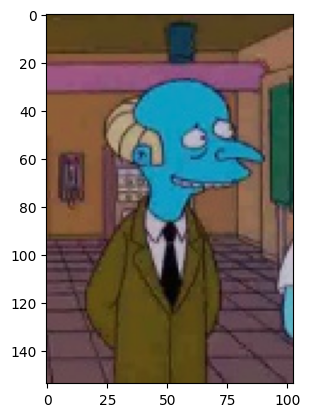

In [148]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [149]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    # image = caer.reshape(image, IMG_SIZE, 1)
    image = np.array(image).astype('float32') / 255.0
    # if images are grayscale, shape is (num_samples, height, width, 1)
    image = image[..., np.newaxis]  # Add channel dimension for grayscale
    
    # Expand dimensions to get (1, height, width, channels): this is your 4D tensor
    image = np.expand_dims(image, axis=0)
    return image

In [150]:
prepare(img).shape

(1, 80, 80, 1)

In [151]:
predictions = model.predict(prepare(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


In [152]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

ned_flanders
